This is the companion Jupyter Notebook of Chapter 4, Molecular Hamiltonians, of the book titled:
"Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" and with ISBN-13: 978-1803243900.
Copyright © 2022, Keeper L. Sharkey and Alain Chancé.

The following MIT license only applies to the code, and not to the text and images. The authors are not granting a license to replicate or reuse the text and images in the companion Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


# 4. Molecular Hamiltonians

# Technical requirements

# Summary of updates V2
## Purpose
This Jupyter notebook has been adapted to work with Qiskit Nature v0.5 and the new Qiskit Runtime primitives. 

Please refer to the following documentation:

Electronic Structure Problems with v0.5, https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html

Leveraging Qiskit Runtime
https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html

FermionicOp
https://qiskit.org/documentation/nature/locale/bn_BN/stubs/qiskit_nature.second_q.operators.FermionicOp.html

## New install command
Install qiskit.utils with the following command (V2):
```
pip install qiskit.utils
```
## Updates in import statements
Previously
```
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.transformers.second_quantization.electronic import ActiveSpaceTransformer, FreezeCoreTransformer
from qiskit_nature.operators.second_quantization import FermionicOp
```
New
```
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.properties import ParticleNumber
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer, FreezeCoreTransformer
from qiskit_nature.second_q.operators import FermionicOp
```

## Updates in code

### Removed figure 4.10 and figure 4.11 showing the molecular orbital (MO) 1-body and (MO) 2-body terms
The One body and two bodies integrals which were components of qiskit_nature.properties are no longer supported, see: https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html#qiskit_nature.properties

```
second_quantization.electronic.integrals.OneBodyElectronicIntegrals removed
second_quantization.electronic.integrals.TwoBodyElectronicIntegrals removed
```

### Updates pertaining to the new MoleculeInfo data structure
The MoleculeInfo has become a pure data container and no longer supports degrees of freedom. This version uses a new info_dict dictionary to set up both the MoleculeInfo and the PySCF molecule data structure.

The info_dict dictionary contains the following keys:
- 'atoms', a list of atoms names, e.g. "Li", "H".
- 'coords', Cartesian coordinates $(x, y, z)$ of the atom’s position in units of angstroms., e.g. (0.0, 0.0, 0.0), (0.0, 0.0, 1.5474)
- 'charge', integer, the electric charge on the molecule.
- 'multiplicity', integer, the multiplicity $2S+1$ of the molecule, where $S$ is the total spin angular momentum which is determined by the number of unpaired electrons in the molecule, that is the number of electrons that occupy a molecular orbital singly, not with another electron.
- 'atom_pair', the pair of atoms used by bopes() to compute and plot the BOPES of the molecule. They must have their Cartesian coordinates in the same line or in the same plane. The perturbation is applied to the first atom in the atom_pair.

Previously
```
H2_molecule = Molecule(geometry=[['H', [0., 0., 0.]],['H', [0., 0., 0.735]]],charge=0, multiplicity=1)
```
New
```
H2_atoms = ["H", "H"]
H2_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 0.735)]
H2_charge = 0
H2_multiplicity = 1
H2_atom_pair=(1, 0)
H2_info_dict={'atoms':H2_atoms, 'coords':H2_coords, 'charge':H2_charge, 'multiplicity':H2_multiplicity, 'atom_pair':H2_atom_pair}

H2_moleculeinfo = MoleculeInfo(H2_atoms, H2_coords, charge=H2_charge, multiplicity=H2_multiplicity)
```

Previously
```
LiH_molecule = Molecule(geometry=[['Li', [0., 0., 0.]], ['H', [0., 0., 1.5474]]], charge=0, multiplicity=1)
```

New
```
LiH_atoms = ["Li", "H"]
LiH_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 1.5474)]
LiH_charge = 0
LiH_multiplicity = 1
LiH_atom_pair=(1,0)
LiH_info_dict={'atoms':LiH_atoms, 'coords':LiH_coords, 'charge':LiH_charge, 'multiplicity':LiH_multiplicity, 'atom_pair':LiH_atom_pair}

LiH_moleculeinfo = MoleculeInfo(LiH_atoms, LiH_coords, charge=LiH_charge, multiplicity=LiH_multiplicity)
```

### Updates pertaining to the get_particle_number() function
Previously
```
def get_particle_number(problem, show=True):
  particle_number = problem.grouped_property_transformed.get_property("ParticleNumber")
  num_particles = (particle_number.num_alpha, particle_number.num_beta)
  num_spin_orbitals = particle_number.num_spin_orbitals
  if show:
    print("Number of alpha electrons: {}".format(particle_number.num_alpha))
    print("Number of beta electrons: {}".format(particle_number.num_beta))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
  return particle_number
```
New
```
def get_particle_number(problem, qubit_converter, show=True):
  num_particles = qubit_converter.num_particles
  
  # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.problems.ElectronicStructureProblem.num_spin_orbitals.html
  num_spin_orbitals = problem.num_spin_orbitals
  
  if show:
    print("Number of particles: {}".format(num_particles))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
    
  return num_particles, num_spin_orbitals
```
### Updates pertaining to the fermion_to_qubit() function
Now second_q_op is used as a replacement for second_q_op[0]

Previously
```
def fermion_to_qubit(f_op, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op[0], num_particles=f_op.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op[0])
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter
```
New
```
def fermion_to_qubit(problem, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      # QubitConverter.convert
      # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.convert.html
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op, num_particles=problem.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op)
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter
```
### Updates pertaining to the label_to_qubit() function
A FermionicOp is initialized with a dictionary, mapping terms to their respective coefficients.

```
for k in ({"+_0":1.0}, {"+_1":1.0}, {"+_2":1.0}, {"+_3":1.0}, {"+_4":1.0}):
  qubit_op = label_to_qubit(k, BravyiKitaevMapper())
  print("{}:\n {}\n".format(k, qubit_op))
```
```
{'+_0': 1.0}:
 0.5 * X
+ -0.5j * Y

{'+_1': 1.0}:
 0.5 * XZ
+ -0.5j * YZ

{'+_2': 1.0}:
 0.5 * XZZ
+ -0.5j * YZZ

{'+_3': 1.0}:
 0.5 * XZZZ
+ -0.5j * YZZZ

{'+_4': 1.0}:
 0.5 * XZZZZ
+ -0.5j * YZZZZ
```

## Installing NumPy, Qiskit and importing various modules
Install NumPy with the following command:

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Install Qiskit with the following command:

In [2]:
pip install qiskit

  Using cached qiskit_terra-0.21.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.22.3
    Uninstalling qiskit-terra-0.22.3:
      Successfully uninstalled qiskit-terra-0.22.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-nature 0.5.1 requires qiskit-terra>=0.22.*, but you have qiskit-terra 0.21.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Install Qiskit visualization support with the following command:

In [3]:
pip install 'qiskit[visualization]'

Note: you may need to restart the kernel to use updated packages.


Install qiskit.utils with the following command (V2):

In [4]:
pip install qiskit.utils

Note: you may need to restart the kernel to use updated packages.


Install Qiskit Nature with the following command:

In [5]:
pip install qiskit-nature

  Using cached qiskit_terra-0.22.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.21.2
    Uninstalling qiskit-terra-0.21.2:
      Successfully uninstalled qiskit-terra-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit 0.38.0 requires qiskit-terra==0.21.2, but you have qiskit-terra 0.22.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Install PySCF with the following command:

In [6]:
pip install pyscf

Note: you may need to restart the kernel to use updated packages.


Import NumPy with the following command:

In [7]:
import numpy as np

Import Matplotlib, a comprehensive library for creating static, animated, and interactive visualizations in Python with the following command:



In [8]:
import matplotlib.pyplot as plt

Import the required functions and class methods with the following commands. The array_to_latex function() returns a Latex representation of a complex array with dimension 1 or 2:

In [9]:
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import execute, Aer
import qiskit.quantum_info as qi
from qiskit.quantum_info import SparsePauliOp
from qiskit.extensions import Initialize
#from qiskit.providers.aer import extensions  # import aer snapshot instructions

Import Qiskit Nature libraries with the following commands:

In [10]:
from qiskit import Aer
#from qiskit_nature.drivers import UnitsType, Molecule

#from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
#from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
#from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
#from qiskit_nature.converters.second_quantization import QubitConverter

# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.properties import ParticleNumber
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer, FreezeCoreTransformer
from qiskit_nature.second_q.operators import FermionicOp

#from qiskit_nature.operators.second_quantization import FermionicOp
#from qiskit_nature.circuit.library.initial_states import HartreeFock
#from qiskit_nature.circuit.library.ansatzes import UCCSD

Import the Qiskit Nature property framework with the following command:

In [11]:
#from qiskit_nature.properties import Property, GroupedProperty
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
from qiskit_nature.second_q.operators import ElectronicIntegrals

Import math libraries with the following command:

In [12]:
import cmath
import math

# 4.1. Born-Oppenheimer approximation

# 4.2. Fock space

# 4.3. Fermionic creation and annihilation operators


## 4.3.1. Fermion creation operator


## 4.3.2. Fermion annihilation operator

# 4.4. Molecular Hamiltonian in the Hartree-Fock orbitals basis

# 4.5. Basis sets


## 4.5.1. Slater-type orbitals

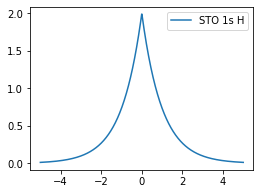

In [13]:
x = np.linspace(-5,5,num=1000)
r = abs(x)

alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="STO 1s H")
plt.legend()

Figure 4.5 – Plot of the radial part of the Slater-type orbital for the $1s$ orbital of the hydrogen atom

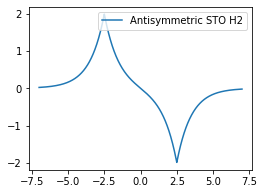

In [14]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)

alpha = 1.0

R = 2*alpha**(1.5)*np.exp(-alpha*r1)-2*alpha**(1.5)*np.exp(-alpha*r2)

plt.figure(figsize=(4,3))
plt.plot(x,R,label="Antisymmetric STO H2")
plt.legend()

Figure 4.6 – Plot of the anti-symmetric wave function of the hydrogen molecule

## 4.5.2. Gaussian-type orbitals

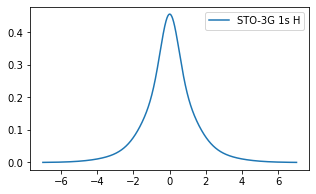

In [15]:
x = np.linspace(-7,7,num=1000)
r = abs(x)

c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
  psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="STO-3G 1s H")
plt.legend()

Figure 4.7 – Plot of the STO-3G function for the $1s$ orbital of the hydrogen atom

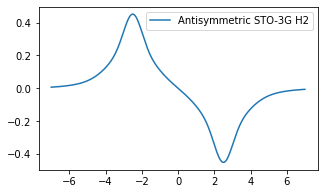

In [16]:
x = np.linspace(-7,7,num=1000)
r1 = abs(x+2.5)
r2 = abs(x-2.5)

c = [0.444635,0.535328,0.154329]
alpha = [0.109818,0.405771,2.227660]

psi = 0
for k in range(3):
  psi += c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r1**2) \
  - c[k]*(2*alpha[k]/np.pi)**0.75 * np.exp(-alpha[k]*r2**2)

plt.figure(figsize=(5,3))
plt.plot(x,psi,label="Antisymmetric STO-3G H2")
plt.legend()

Figure 4.8 – Plot of the antisymmetric STO-3G function for the $1s$ orbital of the hydrogen molecule

# 4.6. Constructing a fermionic Hamiltonian with Qiskit Nature

## 4.6.1. Constructing a fermionic Hamiltonian operator of the hydrogen molecule

In [17]:
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
H2_atoms = ["H", "H"]
H2_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 0.735)]
H2_charge = 0
H2_multiplicity = 1
H2_atom_pair=(1, 0)
H2_info_dict={'atoms':H2_atoms, 'coords':H2_coords, 'charge':H2_charge, 'multiplicity':H2_multiplicity, 'atom_pair':H2_atom_pair}

H2_moleculeinfo = MoleculeInfo(H2_atoms, H2_coords, charge=H2_charge, multiplicity=H2_multiplicity)

In [18]:
H2_driver = PySCFDriver.from_molecule(H2_moleculeinfo, basis="sto3g")

In [19]:
H2_problem = H2_driver.run()

In [20]:
H2_fermionic_hamiltonian = H2_problem.hamiltonian

In [21]:
H2_second_q_op = H2_fermionic_hamiltonian.second_q_op()

In [22]:
def get_particle_number(problem, show=True):
  
  # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.problems.ElectronicStructureProblem.num_spin_orbitals.html
  num_spin_orbitals = problem.num_spin_orbitals
  num_particles = problem.num_particles
  
  if show:
    print("Number of particles: {}".format(num_particles))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
    
  return num_particles, num_spin_orbitals

In [23]:
print("Hydrogen molecule, basis: sto3g, Hartree-Fock calculation")
H2_num_particles, H2_num_spin_orbitals = get_particle_number(H2_problem)

Hydrogen molecule, basis: sto3g, Hartree-Fock calculation
Number of particles: (1, 1)
Number of spin orbitals: 4


Figure 4.9 – Hydrogen molecule, Hartree-Fock calculation for the basis STO-3G, Particle Number

In [24]:
H2_reference_energy = H2_problem.reference_energy
print(H2_reference_energy)

-1.1169989967540035


Figure 4.12 – List of labels used by the Qiskit FermionicOp class

In [25]:
# We print the first 20 terms of the fermionic Hamiltonian operator of the molecule
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
print("\n".join(str(H2_second_q_op).splitlines()[:22] + ["..."]))

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.2563390730032498 * ( +_0 -_0 )
+ -0.4718960072811426 * ( +_1 -_1 )
+ -1.2563390730032498 * ( +_2 -_2 )
+ -0.4718960072811426 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.3322908651276484 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.3322908651276484 * ( +_0 +_3 -_3 -_0 )
+ 0.33229086512764827 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211572 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211564 * ( +_1 +_1 -_0 -_0 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764827 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211572 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211564 * ( +_1 +_3 -_2 -_0 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
...


Figure 4.13 – Fermionic Hamiltonian operator of the hydrogen molecule

In [26]:
print(H2_second_q_op.to_matrix())

  (1, 1)	(-0.4718960072811426+0j)
  (2, 2)	(-1.2563390730032498+0j)
  (3, 3)	(-1.2445845498133272+0j)
  (4, 4)	(-0.4718960072811426+0j)
  (5, 5)	(-0.2452182918302671+0j)
  (10, 5)	(0.1809311997842314+0j)
  (6, 6)	(-1.0636533500290957+0j)
  (9, 6)	(0.18093119978423136+0j)
  (7, 7)	(-0.3533251041071552+0j)
  (8, 8)	(-1.2563390730032498+0j)
  (6, 9)	(0.18093119978423136+0j)
  (9, 9)	(-1.063653350029096+0j)
  (5, 10)	(0.18093119978423128+0j)
  (10, 10)	(-1.8369679912029833+0j)
  (11, 11)	(-1.1606317377577635+0j)
  (12, 12)	(-1.2445845498133272+0j)
  (13, 13)	(-0.353325104107155+0j)
  (14, 14)	(-1.1606317377577644+0j)
  (15, 15)	(0.21427823841947374+0j)


Figure 4.14 – Matrix representation of the fermionic Hamiltonian operator of the hydrogen molecule in the Fock basis

Figure 4.15 – Particle number operators of the fermionic Hamiltonian of the hydrogen molecule

Figure 4.16 – Two-electron exchange operators of the fermionic Hamiltonian of the hydrogen molecule

## 4.6.2. Constructing a fermionic Hamiltonian operator of the lithium hydride molecule

In [27]:
LiH_atoms = ["Li", "H"]
LiH_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 1.5474)]
LiH_charge = 0
LiH_multiplicity = 1
LiH_atom_pair=(1,0)
LiH_info_dict={'atoms':LiH_atoms, 'coords':LiH_coords, 'charge':LiH_charge, 'multiplicity':LiH_multiplicity, 'atom_pair':LiH_atom_pair}

LiH_moleculeinfo = MoleculeInfo(LiH_atoms, LiH_coords, charge=LiH_charge, multiplicity=LiH_multiplicity)

In [28]:
LiH_driver = PySCFDriver.from_molecule(LiH_moleculeinfo, basis="sto3g")

In [29]:
LiH_problem = LiH_driver.run()

In [30]:
#https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
transformer = FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3])
LiH_problem = transformer.transform(LiH_problem)

In [31]:
LiH_fermionic_hamiltonian = LiH_problem.hamiltonian

In [32]:
LiH_second_q_op = LiH_fermionic_hamiltonian.second_q_op()

In [33]:
print("Lithium hydride molecule, basis: sto3g, Hartree-Fock calculation")
print("Parameters freeze_core=True, remove_orbitals=[4, 3]")
LiH_particle_number = get_particle_number(LiH_problem)

Lithium hydride molecule, basis: sto3g, Hartree-Fock calculation
Parameters freeze_core=True, remove_orbitals=[4, 3]
Number of particles: (1, 1)
Number of spin orbitals: 6


Figure 4.17 – Lithium hydride molecule, Hartree-Fock calculation for the basis STO-3G, Particle Number

In [34]:
LiH_reference_energy = LiH_problem.reference_energy
print(LiH_reference_energy)

-7.863113882796402


In [35]:
# We print the first 20 terms of the fermionic Hamiltonian operator of the molecule
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
print("\n".join(str(H2_second_q_op).splitlines()[:22] + ["..."]))

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.2563390730032498 * ( +_0 -_0 )
+ -0.4718960072811426 * ( +_1 -_1 )
+ -1.2563390730032498 * ( +_2 -_2 )
+ -0.4718960072811426 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.3322908651276484 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.3322908651276484 * ( +_0 +_3 -_3 -_0 )
+ 0.33229086512764827 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211572 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211564 * ( +_1 +_1 -_0 -_0 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764827 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211572 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211564 * ( +_1 +_3 -_2 -_0 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
...


Figure 4.20 – First 20 terms of the fermionic Hamiltonian operator of the lithium hydride molecule

In [36]:
print(LiH_second_q_op.to_matrix())

  (1, 1)	(-0.22617114899837443+0j)
  (2, 1)	(0.06823802789342787+0j)
  (4, 1)	(-0.1295811889749172+0j)
  (1, 2)	(0.06823802789342748+0j)
  (2, 2)	(-0.35909729348095665+0j)
  (4, 2)	(0.04770212338497577+0j)
  (3, 3)	(-0.3698582649469247+0j)
  (5, 3)	(0.03641071131675069+0j)
  (6, 3)	(0.14941663465684424+0j)
  (1, 4)	(-0.12958118897491705+0j)
  (2, 4)	(0.04770212338497589+0j)
  (4, 4)	(-0.7806641144801202+0j)
  (3, 5)	(0.03641071131675095+0j)
  (5, 5)	(-0.6744095760097227+0j)
  (6, 5)	(0.05111732964059724+0j)
  (3, 6)	(0.14941663465684402+0j)
  (5, 6)	(0.05111732964059683+0j)
  (6, 6)	(-0.9271642107743943+0j)
  (7, 7)	(-0.6054994947715904+0j)
  (8, 8)	(-0.22617114899837443+0j)
  (16, 8)	(0.06823802789342787+0j)
  (32, 8)	(-0.1295811889749172+0j)
  (9, 9)	(0.0030311090617913816+0j)
  (10, 9)	(0.02442693359812985+0j)
  (12, 9)	(0.007977803586938642+0j)
  :	:
  (53, 54)	(0.036010002483782014+0j)
  (54, 54)	(-0.5746431503966245+0j)
  (31, 55)	(-0.10677454473514049+0j)
  (47, 55)	(-0.00780109

Figure 4.21 – Matrix representation of the Fermionic Hamiltonian operator of the lithium hydride molecule in the Fock basis

# 4.7. Fermion to qubit mappings

## 4.7.1. Qubit creation and annihilation operators

Figure 4.22 – Qubit creation and annihilation operators

## 4.7.2. Jordan-Wigner transformation
Figure 4.23 – Jordan-Wigner transformation

In [37]:
# https://qiskit.org/documentation/nature/locale/bn_BN/stubs/qiskit_nature.second_q.operators.FermionicOp.html
# A FermionicOp is initialized with a dictionary, mapping terms to their respective coefficients
def label_to_qubit(label, converter):
    qubit_converter = QubitConverter(converter)
    f_op = FermionicOp(label)
    qubit_op = qubit_converter.convert(f_op)
    return qubit_op

In [38]:
for k in ({"+_0":1.0}, {"+_1":1.0}, {"+_2":1.0}, {"+_3":1.0}, {"+_4":1.0}):
  qubit_op = label_to_qubit(k, JordanWignerMapper())
  print("{}:\n {}\n".format(k, qubit_op))

{'+_0': 1.0}:
 0.5 * X
+ -0.5j * Y

{'+_1': 1.0}:
 0.5 * XZ
+ -0.5j * YZ

{'+_2': 1.0}:
 0.5 * XZZ
+ -0.5j * YZZ

{'+_3': 1.0}:
 0.5 * XZZZ
+ -0.5j * YZZZ

{'+_4': 1.0}:
 0.5 * XZZZZ
+ -0.5j * YZZZZ



Figure 4.24 – Jordan-Wigner transformation illustrated with "+_0", "+_1", "+_2", "+_3", "+_4"

## 4.7.3. Parity transformation

Figure 4.25 – Parity transformation

In [39]:
for k in ({"+_0":1.0}, {"+_1":1.0}, {"+_2":1.0}, {"+_3":1.0}, {"+_4":1.0}):
  qubit_op = label_to_qubit(k, ParityMapper())
  print("{}:\n {}\n".format(k, qubit_op))

{'+_0': 1.0}:
 0.5 * X
+ -0.5j * Y

{'+_1': 1.0}:
 0.5 * XZ
+ -0.5j * YI

{'+_2': 1.0}:
 0.5 * XZI
+ -0.5j * YII

{'+_3': 1.0}:
 0.5 * XZII
+ -0.5j * YIII

{'+_4': 1.0}:
 0.5 * XZIII
+ -0.5j * YIIII



Figure 4.26 – Parity transformation illustrated with "+_0", "+_1", "+_2", "+_3", "+_4"

## 4.7.4. Bravyi-Kitaev transformation

In [40]:
def BK(m):
  I = [[1, 0], [0, 1]]
  d = {}
  d[0] = [1]
  for k in range(0, m):
    B = np.kron(I,d[k])
    for l in range(2**k, 2**(k+1)):
      B[0,l] = 1
    d[k+1] = B
  return d

In [41]:
d = BK(3)
for k, v in d.items():
  s = "B_{"+str(2**k)+"} = "
  display(array_to_latex(v, prefix=s, precision = 0))
  print(" ")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Figure 4.27 – BK matrices $B_1$, $B_2$, $B_4$ and $B_8$

Figure 4.28 – BK transformation

In [42]:
for k in ({"+_0":1.0}, {"+_1":1.0}, {"+_2":1.0}, {"+_3":1.0}, {"+_4":1.0}):
  qubit_op = label_to_qubit(k, BravyiKitaevMapper())
  print("{}:\n {}\n".format(k, qubit_op))

{'+_0': 1.0}:
 0.5 * X
+ -0.5j * Y

{'+_1': 1.0}:
 0.5 * XZ
+ -0.5j * YI

{'+_2': 1.0}:
 0.5 * XZI
+ -0.5j * YZI

{'+_3': 1.0}:
 0.5 * XZZI
+ -0.5j * YIII

{'+_4': 1.0}:
 0.5 * XZIII
+ -0.5j * YZIII



Figure 4.29 – Bravyi-Kitaev transformation illustrated with "+_0", "+_1", "+_2", "+_3", "+_4"

# 4.8. Constructing a qubit Hamiltonian with Qiskit Nature

In [43]:
def fermion_to_qubit(problem, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      # QubitConverter.convert
      # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.convert.html
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op, num_particles=problem.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op)
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter

## 4.8.1. Constructing a qubit Hamiltonian operator of the hydrogen molecule

In [44]:
print("Hydrogen molecule")
H2_qubit_op, qubit_converter = fermion_to_qubit(H2_problem, H2_second_q_op, "Jordan-Wigner", two_qubit_reduction=True)

Hydrogen molecule
Qubit Hamiltonian operator
Jordan-Wigner transformation 
Number of items in the Pauli list: 15
-0.8105479805373256 * IIII
+ 0.1721839326191555 * IIIZ
- 0.22575349222402358 * IIZI
+ 0.1721839326191552 * IZII
- 0.22575349222402366 * ZIII
+ 0.12091263261776636 * IIZZ
+ 0.16892753870087907 * IZIZ
+ 0.04523279994605784 * YYYY
+ 0.04523279994605784 * XXYY
+ 0.04523279994605784 * YYXX
+ 0.04523279994605784 * XXXX
+ 0.16614543256382414 * ZIIZ
+ 0.16614543256382414 * IZZI
+ 0.1746434306830045 * ZIZI
+ 0.12091263261776636 * ZZII


Figure 4.30 – Qubit Hamiltonian operator of $H_2$ with the JW transformation

In [45]:
print("Hydrogen molecule")
H2_qubit_op, qubit_converter = fermion_to_qubit(H2_problem, H2_second_q_op, "Parity", two_qubit_reduction=True)

Hydrogen molecule
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
-1.0523732457728578 * II
+ 0.39793742484317896 * IZ
- 0.39793742484317873 * ZI
- 0.011280104256235296 * ZZ
+ 0.18093119978423128 * XX


Figure 4.31 – Qubit Hamiltonian operator of $H_2$ with parity transformation, two_qubit_reduction True

In [46]:
print("Hydrogen molecule")
H2_qubit_op, qubit_converter = fermion_to_qubit(H2_problem, H2_second_q_op, "Bravyi-Kitaev", two_qubit_reduction=True)

Hydrogen molecule
Qubit Hamiltonian operator
Bravyi-Kitaev transformation 
Number of items in the Pauli list: 15
-0.8105479805373256 * IIII
+ 0.1721839326191555 * IIIZ
- 0.22575349222402358 * IIZZ
+ 0.1721839326191552 * IZII
- 0.22575349222402366 * ZZZI
+ 0.12091263261776636 * IIZI
+ 0.16892753870087907 * IZIZ
+ 0.04523279994605784 * ZXIX
- 0.04523279994605784 * IXZX
- 0.04523279994605784 * ZXZX
+ 0.04523279994605784 * IXIX
+ 0.16614543256382414 * ZZZZ
+ 0.16614543256382414 * IZZZ
+ 0.1746434306830045 * ZZIZ
+ 0.12091263261776636 * ZIZI


Figure 4.32 – Qubit Hamiltonian operator of $H_2$ with the Bravyi-Kitaev transformation

## 4.8.2. Constructing a qubit Hamiltonian operator of the lithium hydride molecule

In [47]:
print("Lithium hydride molecule")
print("Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits")
print("Setting z2symmetry_reduction=\"auto\"")
LiH_qubit_op, qubit_converter = fermion_to_qubit(LiH_problem, LiH_second_q_op, "Parity", two_qubit_reduction=True, z2symmetry_reduction="auto")

Lithium hydride molecule
Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits
Setting z2symmetry_reduction="auto"
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
-0.20316606150559155 * IIII
- 0.09275994933497653 * IIIZ
- 0.0029411410873853247 * IIZX
+ 0.0029411410873853247 * IIIX
- 0.0007427996394624159 * IIXX
+ 0.0007427996394624159 * IIYY
- 0.2118898429700831 * IIZZ
+ 0.01938940858368559 * IIXZ
+ 0.019389408583685576 * IIXI
+ 0.36525869021603946 * IIZI
+ 0.09275994933497658 * IZII
+ 0.002941141087385332 * ZXII
+ 0.002941141087385332 * IXII
- 0.0007427996394625096 * XXII
+ 0.0007427996394625096 * YYII
- 0.21188984297008306 * ZZII
- 0.019389408583685624 * XZII
+ 0.019389408583685624 * XIII
- 0.3652586902160397 * ZIII
- 0.12274244052542657 * IZIZ


Figure 4.33 – Qubit Hamiltonian operator of LiH with parity transformation, two_qubit_reduction True

# Summary

# Questions

1. Which of the following terms is neglected in the BO approximation?

A.	Electronic kinetic energy operator.

B.	Nuclear kinetic energy operator.

C.	Potential energy between the electrons and nuclei. It is the sum of all electron-nucleus Coulomb interactions.

D.	Potential energy operator arising from electron-electron Coulomb repulsions.

In [48]:
#@title Enter your answer A, B, C, D or E or ? for a solution, then execute cell.
answer = " " #@param {type:"string"}
solution = "B"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


2. The Slater determinant wave function is antisymmetric with respect to: 

A.	the exchange of two electrons (permutation of two rows) or, 

B.	with respect to the exchange of two spin orbitals (permutation of two columns)

C.	Or both the above?


In [49]:
#@title Enter your answer A, B or C or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "C"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


3. Name three fermion to qubit transformations currently supported by Qiskit Nature.

In [50]:
#@title Enter your answer as one or more words separated by ',' or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Jordan-Wigner, Parity, Bravyi-Kitaev"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


4. Name two fermion to qubit transformations that simulates a system of electrons with the same number of qubits as electrons.

In [51]:
#@title Enter your answer as one or more words separated by ',' or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Jordan-Wigner, Parity"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


5.	For which transformation does the resulting Hamiltonian commute with the number spin up and number spin down operators which can be used to taper off two qubits?

In [52]:
#@title Enter your answer as one or more words separated by ',' or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Jordan-Wigner"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


In [53]:
# Display Qiskit Software and System information
import qiskit.tools.jupyter
%qiskit_version_table